In [1]:
! pip install codecarbon

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.0/179.0 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 4.9 MB/s eta 0:00:00


In [2]:
! curl ipinfo.io

{
  "ip": "35.197.61.242",
  "hostname": "242.61.197.35.bc.googleusercontent.com",
  "city": "The Dalles",
  "region": "Oregon",
  "country": "US",
  "loc": "45.5946,-121.1787",
  "org": "AS396982 Google LLC",
  "postal": "97058",
  "timezone": "America/Los_Angeles",
  "readme": "https://ipinfo.io/missingauth"
}

In [3]:
from numpy import mean
from numpy import std
import keras
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.layers import BatchNormalization
from keras import backend as K
from keras import layers
from codecarbon import track_emissions
import matplotlib.pyplot as plt
import csv

In [4]:
print(K.backend())

tensorflow


[codecarbon INFO @ 20:56:11] offline tracker init
[codecarbon INFO @ 20:56:11] [setup] RAM Tracking...
[codecarbon INFO @ 20:56:11] [setup] GPU Tracking...
[codecarbon INFO @ 20:56:11] No GPU found.
[codecarbon INFO @ 20:56:11] [setup] CPU Tracking...
[codecarbon WARNING @ 20:56:11] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 20:56:13] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 20:56:13] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 20:56:13] >>> Tracker's metadata:
[codecarbon INFO @ 20:56:13]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.35
[codecarbon INFO @ 20:56:13]   Python version: 3.10.12
[codecarbon INFO @ 20:56:13]   CodeCarbon version: 2.3.2
[codecarbon INFO @ 20:56:13]   Available RAM : 12.675 GB
[codecarbon INFO @ 20:56:13]   CPU count: 2
[codecarbon INFO @ 20:56:13]   CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz
[co

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/3


[codecarbon INFO @ 20:56:28] Energy consumed for RAM : 0.000020 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 20:56:28] Energy consumed for all CPUs : 0.000177 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 20:56:28] 0.000197 kWh of electricity used since the beginning.
[codecarbon INFO @ 20:56:43] Energy consumed for RAM : 0.000040 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 20:56:43] Energy consumed for all CPUs : 0.000354 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 20:56:43] 0.000394 kWh of electricity used since the beginning.


1250/1250 - 41s - loss: 0.1506 - accuracy: 0.9542 - val_loss: 0.0702 - val_accuracy: 0.9793 - 41s/epoch - 33ms/step
Epoch 2/3


[codecarbon INFO @ 20:56:58] Energy consumed for RAM : 0.000059 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 20:56:58] Energy consumed for all CPUs : 0.000531 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 20:56:58] 0.000590 kWh of electricity used since the beginning.
[codecarbon INFO @ 20:57:13] Energy consumed for RAM : 0.000079 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 20:57:13] Energy consumed for all CPUs : 0.000708 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 20:57:13] 0.000788 kWh of electricity used since the beginning.
[codecarbon INFO @ 20:57:28] Energy consumed for RAM : 0.000099 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 20:57:28] Energy consumed for all CPUs : 0.000885 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 20:57:28] 0.000984 kWh of electricity used since the beginning.


1250/1250 - 44s - loss: 0.0570 - accuracy: 0.9838 - val_loss: 0.0546 - val_accuracy: 0.9827 - 44s/epoch - 35ms/step
Epoch 3/3


[codecarbon INFO @ 20:57:43] Energy consumed for RAM : 0.000119 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 20:57:43] Energy consumed for all CPUs : 0.001062 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 20:57:43] 0.001181 kWh of electricity used since the beginning.
[codecarbon INFO @ 20:57:58] Energy consumed for RAM : 0.000139 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 20:57:58] Energy consumed for all CPUs : 0.001239 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 20:57:58] 0.001378 kWh of electricity used since the beginning.
[codecarbon INFO @ 20:58:13] Energy consumed for RAM : 0.000158 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 20:58:13] Energy consumed for all CPUs : 0.001416 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 20:58:13] 0.001575 kWh of electricity used since the beginning.


1250/1250 - 45s - loss: 0.0366 - accuracy: 0.9896 - val_loss: 0.0519 - val_accuracy: 0.9837 - 45s/epoch - 36ms/step


[codecarbon INFO @ 20:58:28] Energy consumed for RAM : 0.000178 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 20:58:28] Energy consumed for all CPUs : 0.001594 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 20:58:28] 0.001772 kWh of electricity used since the beginning.


625/625 - 5s - loss: 0.0519 - accuracy: 0.9837 - 5s/epoch - 8ms/step
> 98.375
Epoch 1/3


[codecarbon INFO @ 20:58:43] Energy consumed for RAM : 0.000198 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 20:58:43] Energy consumed for all CPUs : 0.001771 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 20:58:43] 0.001969 kWh of electricity used since the beginning.
[codecarbon INFO @ 20:58:58] Energy consumed for RAM : 0.000218 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 20:58:58] Energy consumed for all CPUs : 0.001948 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 20:58:58] 0.002165 kWh of electricity used since the beginning.
[codecarbon INFO @ 20:59:13] Energy consumed for RAM : 0.000237 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 20:59:13] Energy consumed for all CPUs : 0.002124 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 20:59:13] 0.002362 kWh of electricity used since the beginning.


1250/1250 - 47s - loss: 0.1529 - accuracy: 0.9536 - val_loss: 0.0818 - val_accuracy: 0.9743 - 47s/epoch - 38ms/step
Epoch 2/3


[codecarbon INFO @ 20:59:28] Energy consumed for RAM : 0.000257 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 20:59:28] Energy consumed for all CPUs : 0.002302 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 20:59:28] 0.002559 kWh of electricity used since the beginning.
[codecarbon INFO @ 20:59:43] Energy consumed for RAM : 0.000277 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 20:59:43] Energy consumed for all CPUs : 0.002479 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 20:59:43] 0.002756 kWh of electricity used since the beginning.
[codecarbon INFO @ 20:59:58] Energy consumed for RAM : 0.000297 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 20:59:58] Energy consumed for all CPUs : 0.002656 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 20:59:58] 0.002953 kWh of electricity used since the beginning.


1250/1250 - 40s - loss: 0.0604 - accuracy: 0.9811 - val_loss: 0.0648 - val_accuracy: 0.9806 - 40s/epoch - 32ms/step
Epoch 3/3


[codecarbon INFO @ 21:00:13] Energy consumed for RAM : 0.000317 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 21:00:13] Energy consumed for all CPUs : 0.002833 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:00:13] 0.003150 kWh of electricity used since the beginning.
[codecarbon INFO @ 21:00:28] Energy consumed for RAM : 0.000336 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 21:00:28] Energy consumed for all CPUs : 0.003010 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:00:28] 0.003346 kWh of electricity used since the beginning.


1250/1250 - 41s - loss: 0.0384 - accuracy: 0.9882 - val_loss: 0.0668 - val_accuracy: 0.9810 - 41s/epoch - 33ms/step


[codecarbon INFO @ 21:00:43] Energy consumed for RAM : 0.000356 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 21:00:43] Energy consumed for all CPUs : 0.003187 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:00:43] 0.003543 kWh of electricity used since the beginning.
[codecarbon INFO @ 21:00:58] Energy consumed for RAM : 0.000376 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 21:00:58] Energy consumed for all CPUs : 0.003364 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:00:58] 0.003740 kWh of electricity used since the beginning.


625/625 - 6s - loss: 0.0668 - accuracy: 0.9810 - 6s/epoch - 10ms/step
> 98.100
Epoch 1/3


[codecarbon INFO @ 21:01:13] Energy consumed for RAM : 0.000396 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 21:01:13] Energy consumed for all CPUs : 0.003541 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:01:13] 0.003937 kWh of electricity used since the beginning.
[codecarbon INFO @ 21:01:28] Energy consumed for RAM : 0.000416 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 21:01:28] Energy consumed for all CPUs : 0.003718 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:01:28] 0.004133 kWh of electricity used since the beginning.
[codecarbon INFO @ 21:01:43] Energy consumed for RAM : 0.000435 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 21:01:43] Energy consumed for all CPUs : 0.003895 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:01:43] 0.004330 kWh of electricity used since the beginning.


1250/1250 - 46s - loss: 0.1442 - accuracy: 0.9563 - val_loss: 0.0808 - val_accuracy: 0.9746 - 46s/epoch - 37ms/step
Epoch 2/3


[codecarbon INFO @ 21:01:58] Energy consumed for RAM : 0.000455 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 21:01:58] Energy consumed for all CPUs : 0.004071 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:01:58] 0.004526 kWh of electricity used since the beginning.
[codecarbon INFO @ 21:02:13] Energy consumed for RAM : 0.000475 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 21:02:13] Energy consumed for all CPUs : 0.004248 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:02:13] 0.004723 kWh of electricity used since the beginning.
[codecarbon INFO @ 21:02:28] Energy consumed for RAM : 0.000495 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 21:02:28] Energy consumed for all CPUs : 0.004425 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:02:28] 0.004920 kWh of electricity used since the beginning.


1250/1250 - 41s - loss: 0.0549 - accuracy: 0.9838 - val_loss: 0.0670 - val_accuracy: 0.9791 - 41s/epoch - 33ms/step
Epoch 3/3


[codecarbon INFO @ 21:02:43] Energy consumed for RAM : 0.000514 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 21:02:43] Energy consumed for all CPUs : 0.004602 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:02:43] 0.005117 kWh of electricity used since the beginning.
[codecarbon INFO @ 21:02:58] Energy consumed for RAM : 0.000534 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 21:02:58] Energy consumed for all CPUs : 0.004780 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:02:58] 0.005314 kWh of electricity used since the beginning.


1250/1250 - 40s - loss: 0.0342 - accuracy: 0.9895 - val_loss: 0.0636 - val_accuracy: 0.9814 - 40s/epoch - 32ms/step


[codecarbon INFO @ 21:03:13] Energy consumed for RAM : 0.000554 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 21:03:13] Energy consumed for all CPUs : 0.004957 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:03:13] 0.005511 kWh of electricity used since the beginning.


625/625 - 6s - loss: 0.0636 - accuracy: 0.9814 - 6s/epoch - 10ms/step
> 98.140


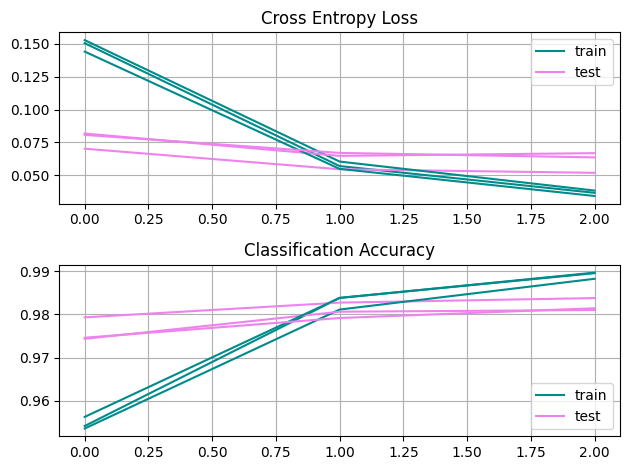

Accuracy: mean=98.205 std=0.121, n=3


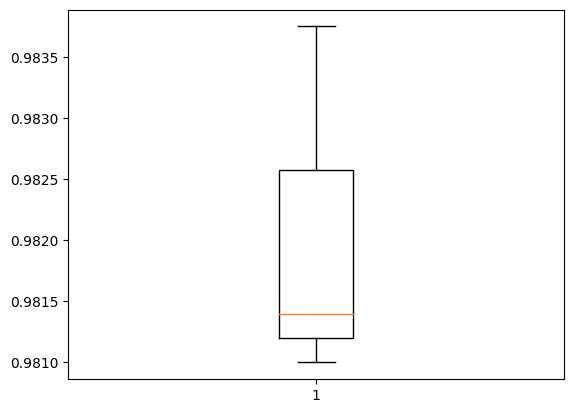

[codecarbon INFO @ 21:03:21] 
Graceful stopping: collecting and writing information.
Please wait a few seconds...
[codecarbon INFO @ 21:03:21] Energy consumed for RAM : 0.000564 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 21:03:21] Energy consumed for all CPUs : 0.005044 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:03:21] 0.005608 kWh of electricity used since the beginning.
[codecarbon INFO @ 21:03:21] Done!

[codecarbon INFO @ 21:03:21] offline tracker init
[codecarbon INFO @ 21:03:21] [setup] RAM Tracking...
[codecarbon INFO @ 21:03:21] [setup] GPU Tracking...
[codecarbon INFO @ 21:03:21] No GPU found.
[codecarbon INFO @ 21:03:21] [setup] CPU Tracking...
[codecarbon WARNING @ 21:03:21] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 21:03:23] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 21:03:23] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2

Epoch 1/3


[codecarbon INFO @ 21:03:38] Energy consumed for RAM : 0.000020 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 21:03:38] Energy consumed for all CPUs : 0.000177 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:03:38] 0.000197 kWh of electricity used since the beginning.
[codecarbon INFO @ 21:03:53] Energy consumed for RAM : 0.000040 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 21:03:53] Energy consumed for all CPUs : 0.000354 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:03:53] 0.000394 kWh of electricity used since the beginning.


1250/1250 - 41s - loss: 0.1525 - accuracy: 0.9540 - val_loss: 0.0798 - val_accuracy: 0.9761 - 41s/epoch - 33ms/step
Epoch 2/3


[codecarbon INFO @ 21:04:08] Energy consumed for RAM : 0.000059 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 21:04:08] Energy consumed for all CPUs : 0.000531 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:04:08] 0.000591 kWh of electricity used since the beginning.
[codecarbon INFO @ 21:04:23] Energy consumed for RAM : 0.000079 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 21:04:23] Energy consumed for all CPUs : 0.000708 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:04:23] 0.000788 kWh of electricity used since the beginning.
[codecarbon INFO @ 21:04:38] Energy consumed for RAM : 0.000099 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 21:04:38] Energy consumed for all CPUs : 0.000885 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:04:38] 0.000984 kWh of electricity used since the beginning.


1250/1250 - 39s - loss: 0.0575 - accuracy: 0.9831 - val_loss: 0.0645 - val_accuracy: 0.9801 - 39s/epoch - 31ms/step
Epoch 3/3


[codecarbon INFO @ 21:04:53] Energy consumed for RAM : 0.000119 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 21:04:53] Energy consumed for all CPUs : 0.001063 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:04:53] 0.001182 kWh of electricity used since the beginning.
[codecarbon INFO @ 21:05:08] Energy consumed for RAM : 0.000139 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 21:05:08] Energy consumed for all CPUs : 0.001240 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:05:08] 0.001379 kWh of electricity used since the beginning.


1250/1250 - 38s - loss: 0.0356 - accuracy: 0.9891 - val_loss: 0.0535 - val_accuracy: 0.9837 - 38s/epoch - 30ms/step


[codecarbon INFO @ 21:05:23] Energy consumed for RAM : 0.000158 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 21:05:23] Energy consumed for all CPUs : 0.001417 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:05:23] 0.001576 kWh of electricity used since the beginning.
[codecarbon INFO @ 21:05:38] Energy consumed for RAM : 0.000178 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 21:05:38] Energy consumed for all CPUs : 0.001594 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:05:38] 0.001773 kWh of electricity used since the beginning.


625/625 - 5s - loss: 0.0535 - accuracy: 0.9837 - 5s/epoch - 8ms/step


[codecarbon INFO @ 21:05:53] Energy consumed for RAM : 0.000198 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 21:05:53] Energy consumed for all CPUs : 0.001771 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:05:53] 0.001969 kWh of electricity used since the beginning.


> 98.370
Epoch 1/3


[codecarbon INFO @ 21:06:08] Energy consumed for RAM : 0.000218 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 21:06:08] Energy consumed for all CPUs : 0.001948 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:06:08] 0.002166 kWh of electricity used since the beginning.
[codecarbon INFO @ 21:06:23] Energy consumed for RAM : 0.000238 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 21:06:23] Energy consumed for all CPUs : 0.002126 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:06:23] 0.002363 kWh of electricity used since the beginning.


1250/1250 - 40s - loss: 0.1511 - accuracy: 0.9549 - val_loss: 0.0758 - val_accuracy: 0.9769 - 40s/epoch - 32ms/step
Epoch 2/3


[codecarbon INFO @ 21:06:38] Energy consumed for RAM : 0.000257 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 21:06:38] Energy consumed for all CPUs : 0.002303 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:06:38] 0.002560 kWh of electricity used since the beginning.
[codecarbon INFO @ 21:06:53] Energy consumed for RAM : 0.000277 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 21:06:53] Energy consumed for all CPUs : 0.002480 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:06:53] 0.002757 kWh of electricity used since the beginning.
[codecarbon INFO @ 21:07:08] Energy consumed for RAM : 0.000297 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 21:07:08] Energy consumed for all CPUs : 0.002657 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:07:08] 0.002954 kWh of electricity used since the beginning.


1250/1250 - 39s - loss: 0.0550 - accuracy: 0.9830 - val_loss: 0.0638 - val_accuracy: 0.9802 - 39s/epoch - 31ms/step
Epoch 3/3


[codecarbon INFO @ 21:07:23] Energy consumed for RAM : 0.000317 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 21:07:23] Energy consumed for all CPUs : 0.002834 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:07:23] 0.003150 kWh of electricity used since the beginning.
[codecarbon INFO @ 21:07:38] Energy consumed for RAM : 0.000337 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 21:07:38] Energy consumed for all CPUs : 0.003010 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:07:38] 0.003347 kWh of electricity used since the beginning.
[codecarbon INFO @ 21:07:53] Energy consumed for RAM : 0.000356 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 21:07:53] Energy consumed for all CPUs : 0.003188 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:07:53] 0.003544 kWh of electricity used since the beginning.


1250/1250 - 41s - loss: 0.0341 - accuracy: 0.9898 - val_loss: 0.0546 - val_accuracy: 0.9837 - 41s/epoch - 33ms/step
625/625 - 6s - loss: 0.0546 - accuracy: 0.9837 - 6s/epoch - 10ms/step
> 98.370
Epoch 1/3


[codecarbon INFO @ 21:08:08] Energy consumed for RAM : 0.000376 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 21:08:08] Energy consumed for all CPUs : 0.003365 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:08:08] 0.003741 kWh of electricity used since the beginning.
[codecarbon INFO @ 21:08:23] Energy consumed for RAM : 0.000396 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 21:08:23] Energy consumed for all CPUs : 0.003542 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:08:23] 0.003938 kWh of electricity used since the beginning.
[codecarbon INFO @ 21:08:38] Energy consumed for RAM : 0.000416 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 21:08:38] Energy consumed for all CPUs : 0.003719 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:08:38] 0.004135 kWh of electricity used since the beginning.


1250/1250 - 41s - loss: 0.1470 - accuracy: 0.9562 - val_loss: 0.0737 - val_accuracy: 0.9775 - 41s/epoch - 33ms/step
Epoch 2/3


[codecarbon INFO @ 21:08:53] Energy consumed for RAM : 0.000436 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 21:08:53] Energy consumed for all CPUs : 0.003896 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:08:53] 0.004331 kWh of electricity used since the beginning.
[codecarbon INFO @ 21:09:08] Energy consumed for RAM : 0.000455 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 21:09:08] Energy consumed for all CPUs : 0.004073 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:09:08] 0.004528 kWh of electricity used since the beginning.
[codecarbon INFO @ 21:09:23] Energy consumed for RAM : 0.000475 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 21:09:23] Energy consumed for all CPUs : 0.004250 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:09:23] 0.004725 kWh of electricity used since the beginning.


1250/1250 - 39s - loss: 0.0550 - accuracy: 0.9837 - val_loss: 0.0610 - val_accuracy: 0.9811 - 39s/epoch - 31ms/step
Epoch 3/3


[codecarbon INFO @ 21:09:38] Energy consumed for RAM : 0.000495 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 21:09:38] Energy consumed for all CPUs : 0.004426 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:09:38] 0.004921 kWh of electricity used since the beginning.
[codecarbon INFO @ 21:09:53] Energy consumed for RAM : 0.000515 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 21:09:53] Energy consumed for all CPUs : 0.004603 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:09:53] 0.005118 kWh of electricity used since the beginning.


1250/1250 - 39s - loss: 0.0328 - accuracy: 0.9905 - val_loss: 0.0566 - val_accuracy: 0.9825 - 39s/epoch - 31ms/step


[codecarbon INFO @ 21:10:08] Energy consumed for RAM : 0.000534 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 21:10:08] Energy consumed for all CPUs : 0.004780 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:10:08] 0.005315 kWh of electricity used since the beginning.
[codecarbon INFO @ 21:10:23] Energy consumed for RAM : 0.000554 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 21:10:23] Energy consumed for all CPUs : 0.004957 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:10:23] 0.005511 kWh of electricity used since the beginning.


625/625 - 5s - loss: 0.0566 - accuracy: 0.9825 - 5s/epoch - 8ms/step
> 98.245


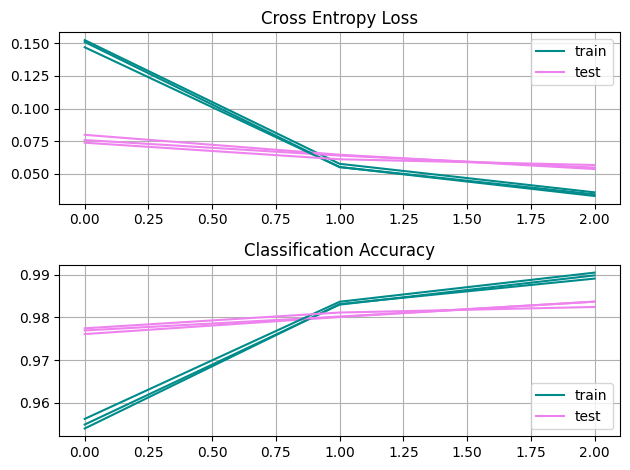

Accuracy: mean=98.328 std=0.059, n=3


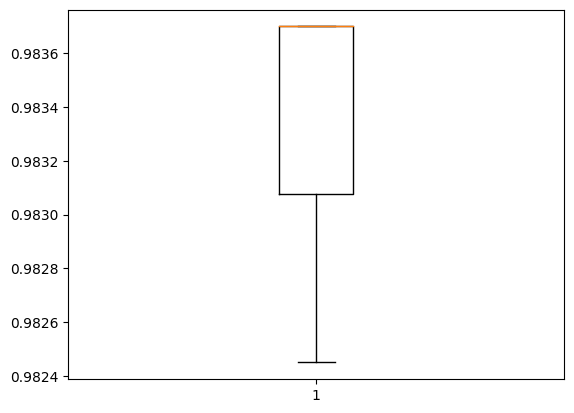

[codecarbon INFO @ 21:10:34] 
Graceful stopping: collecting and writing information.
Please wait a few seconds...
[codecarbon INFO @ 21:10:34] Energy consumed for RAM : 0.000568 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 21:10:34] Energy consumed for all CPUs : 0.005083 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:10:34] 0.005651 kWh of electricity used since the beginning.
[codecarbon INFO @ 21:10:34] Done!

[codecarbon INFO @ 21:10:34] offline tracker init
[codecarbon INFO @ 21:10:34] [setup] RAM Tracking...
[codecarbon INFO @ 21:10:34] [setup] GPU Tracking...
[codecarbon INFO @ 21:10:34] No GPU found.
[codecarbon INFO @ 21:10:34] [setup] CPU Tracking...
[codecarbon WARNING @ 21:10:34] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 21:10:36] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 21:10:36] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2

Epoch 1/3


[codecarbon INFO @ 21:10:51] Energy consumed for RAM : 0.000020 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 21:10:51] Energy consumed for all CPUs : 0.000177 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:10:51] 0.000197 kWh of electricity used since the beginning.
[codecarbon INFO @ 21:11:06] Energy consumed for RAM : 0.000040 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 21:11:06] Energy consumed for all CPUs : 0.000354 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:11:06] 0.000394 kWh of electricity used since the beginning.


1250/1250 - 40s - loss: 0.1502 - accuracy: 0.9549 - val_loss: 0.0756 - val_accuracy: 0.9772 - 40s/epoch - 32ms/step
Epoch 2/3


[codecarbon INFO @ 21:11:21] Energy consumed for RAM : 0.000059 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 21:11:21] Energy consumed for all CPUs : 0.000531 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:11:21] 0.000591 kWh of electricity used since the beginning.
[codecarbon INFO @ 21:11:36] Energy consumed for RAM : 0.000079 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 21:11:36] Energy consumed for all CPUs : 0.000708 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:11:36] 0.000787 kWh of electricity used since the beginning.
[codecarbon INFO @ 21:11:51] Energy consumed for RAM : 0.000099 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 21:11:51] Energy consumed for all CPUs : 0.000885 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:11:51] 0.000984 kWh of electricity used since the beginning.


1250/1250 - 40s - loss: 0.0544 - accuracy: 0.9837 - val_loss: 0.0569 - val_accuracy: 0.9833 - 40s/epoch - 32ms/step
Epoch 3/3


[codecarbon INFO @ 21:12:06] Energy consumed for RAM : 0.000119 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 21:12:06] Energy consumed for all CPUs : 0.001062 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:12:06] 0.001181 kWh of electricity used since the beginning.
[codecarbon INFO @ 21:12:21] Energy consumed for RAM : 0.000139 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 21:12:21] Energy consumed for all CPUs : 0.001239 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:12:21] 0.001378 kWh of electricity used since the beginning.
[codecarbon INFO @ 21:12:36] Energy consumed for RAM : 0.000158 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 21:12:36] Energy consumed for all CPUs : 0.001416 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:12:36] 0.001575 kWh of electricity used since the beginning.


1250/1250 - 42s - loss: 0.0337 - accuracy: 0.9897 - val_loss: 0.0599 - val_accuracy: 0.9819 - 42s/epoch - 33ms/step
625/625 - 5s - loss: 0.0599 - accuracy: 0.9819 - 5s/epoch - 8ms/step
> 98.195
Epoch 1/3


[codecarbon INFO @ 21:12:51] Energy consumed for RAM : 0.000178 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 21:12:51] Energy consumed for all CPUs : 0.001593 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:12:51] 0.001772 kWh of electricity used since the beginning.
[codecarbon INFO @ 21:13:06] Energy consumed for RAM : 0.000198 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 21:13:06] Energy consumed for all CPUs : 0.001770 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:13:06] 0.001968 kWh of electricity used since the beginning.
[codecarbon INFO @ 21:13:21] Energy consumed for RAM : 0.000218 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 21:13:21] Energy consumed for all CPUs : 0.001947 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:13:21] 0.002165 kWh of electricity used since the beginning.


1250/1250 - 39s - loss: 0.1455 - accuracy: 0.9561 - val_loss: 0.0754 - val_accuracy: 0.9771 - 39s/epoch - 31ms/step
Epoch 2/3


[codecarbon INFO @ 21:13:36] Energy consumed for RAM : 0.000237 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 21:13:36] Energy consumed for all CPUs : 0.002124 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:13:36] 0.002362 kWh of electricity used since the beginning.
[codecarbon INFO @ 21:13:51] Energy consumed for RAM : 0.000257 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 21:13:51] Energy consumed for all CPUs : 0.002301 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:13:51] 0.002558 kWh of electricity used since the beginning.


1250/1250 - 38s - loss: 0.0544 - accuracy: 0.9832 - val_loss: 0.0617 - val_accuracy: 0.9804 - 38s/epoch - 31ms/step
Epoch 3/3


[codecarbon INFO @ 21:14:06] Energy consumed for RAM : 0.000277 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 21:14:06] Energy consumed for all CPUs : 0.002478 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:14:06] 0.002755 kWh of electricity used since the beginning.
[codecarbon INFO @ 21:14:21] Energy consumed for RAM : 0.000297 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 21:14:21] Energy consumed for all CPUs : 0.002655 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:14:21] 0.002952 kWh of electricity used since the beginning.
[codecarbon INFO @ 21:14:36] Energy consumed for RAM : 0.000317 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 21:14:36] Energy consumed for all CPUs : 0.002832 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:14:36] 0.003149 kWh of electricity used since the beginning.


1250/1250 - 43s - loss: 0.0336 - accuracy: 0.9902 - val_loss: 0.0526 - val_accuracy: 0.9850 - 43s/epoch - 34ms/step
625/625 - 5s - loss: 0.0526 - accuracy: 0.9850 - 5s/epoch - 8ms/step
> 98.495
Epoch 1/3


[codecarbon INFO @ 21:14:51] Energy consumed for RAM : 0.000336 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 21:14:51] Energy consumed for all CPUs : 0.003010 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:14:51] 0.003346 kWh of electricity used since the beginning.
[codecarbon INFO @ 21:15:06] Energy consumed for RAM : 0.000356 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 21:15:06] Energy consumed for all CPUs : 0.003187 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:15:06] 0.003543 kWh of electricity used since the beginning.
[codecarbon INFO @ 21:15:21] Energy consumed for RAM : 0.000376 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 21:15:21] Energy consumed for all CPUs : 0.003364 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:15:21] 0.003740 kWh of electricity used since the beginning.


1250/1250 - 39s - loss: 0.1467 - accuracy: 0.9566 - val_loss: 0.0774 - val_accuracy: 0.9758 - 39s/epoch - 31ms/step
Epoch 2/3


[codecarbon INFO @ 21:15:36] Energy consumed for RAM : 0.000396 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 21:15:36] Energy consumed for all CPUs : 0.003541 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:15:36] 0.003937 kWh of electricity used since the beginning.
[codecarbon INFO @ 21:15:51] Energy consumed for RAM : 0.000416 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 21:15:51] Energy consumed for all CPUs : 0.003718 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:15:51] 0.004133 kWh of electricity used since the beginning.
[codecarbon INFO @ 21:16:06] Energy consumed for RAM : 0.000435 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 21:16:06] Energy consumed for all CPUs : 0.003895 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:16:06] 0.004330 kWh of electricity used since the beginning.


1250/1250 - 41s - loss: 0.0574 - accuracy: 0.9825 - val_loss: 0.0700 - val_accuracy: 0.9788 - 41s/epoch - 33ms/step
Epoch 3/3


[codecarbon INFO @ 21:16:21] Energy consumed for RAM : 0.000455 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 21:16:21] Energy consumed for all CPUs : 0.004072 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:16:21] 0.004527 kWh of electricity used since the beginning.
[codecarbon INFO @ 21:16:36] Energy consumed for RAM : 0.000475 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 21:16:36] Energy consumed for all CPUs : 0.004249 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:16:36] 0.004724 kWh of electricity used since the beginning.


1250/1250 - 38s - loss: 0.0334 - accuracy: 0.9895 - val_loss: 0.0563 - val_accuracy: 0.9823 - 38s/epoch - 30ms/step


[codecarbon INFO @ 21:16:51] Energy consumed for RAM : 0.000495 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 21:16:51] Energy consumed for all CPUs : 0.004426 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:16:51] 0.004921 kWh of electricity used since the beginning.
[codecarbon INFO @ 21:17:06] Energy consumed for RAM : 0.000515 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 21:17:06] Energy consumed for all CPUs : 0.004603 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:17:06] 0.005117 kWh of electricity used since the beginning.


625/625 - 5s - loss: 0.0563 - accuracy: 0.9823 - 5s/epoch - 8ms/step
> 98.235


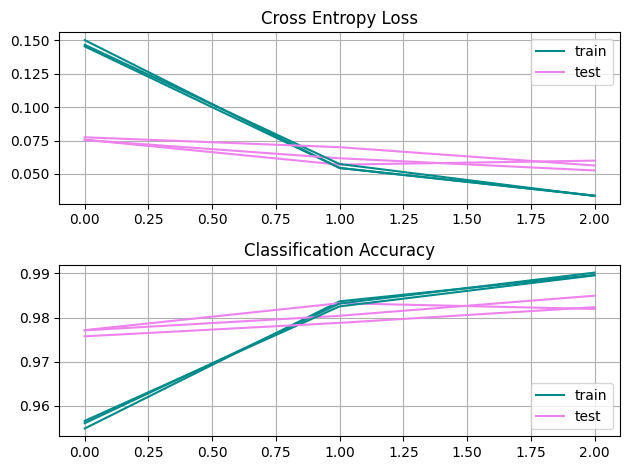

Accuracy: mean=98.308 std=0.133, n=3


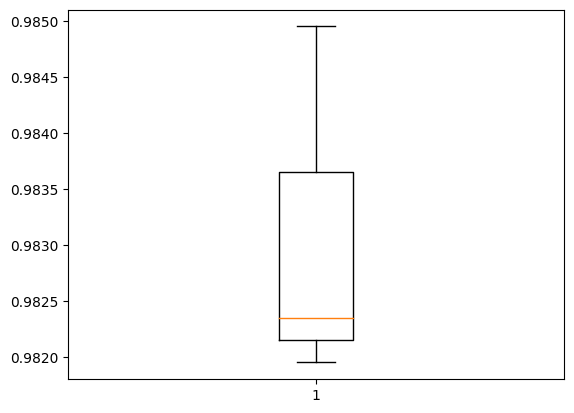

[codecarbon INFO @ 21:17:19] 
Graceful stopping: collecting and writing information.
Please wait a few seconds...
[codecarbon INFO @ 21:17:19] Energy consumed for RAM : 0.000532 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 21:17:19] Energy consumed for all CPUs : 0.004762 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:17:19] 0.005294 kWh of electricity used since the beginning.
[codecarbon INFO @ 21:17:19] Done!



In [5]:
# cnn model with batch normalization for mnist
# load train and test dataset
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = mnist.load_data()
	# reshape dataset to have a single channel
	trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
	testX = testX.reshape((testX.shape[0], 28, 28, 1))
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY

# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm

# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
	model.add(BatchNormalization())
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(learning_rate=0.01, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

# evaluate a model using k-fold cross-validation
def evaluate_model(dataX, dataY, n_folds=3):
	scores, histories = list(), list()
	# prepare cross validation
	kfold = KFold(n_folds, shuffle=True, random_state=42)
	# enumerate splits
	for train_ix, test_ix in kfold.split(dataX):
		# define model
		model = define_model()
		# select rows for train and test
		trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
		# fit model
		history = model.fit(trainX, trainY, epochs=3, batch_size=32, validation_data=(testX, testY), verbose=2)
		# evaluate model
		_, acc = model.evaluate(testX, testY, verbose=2)
		print('> %.3f' % (acc * 100.0))
		# stores scores
		scores.append(acc)
		histories.append(history)
	return scores, histories

# plot diagnostic learning curves
def summarize_diagnostics(histories):
	for i in range(len(histories)):
		# plot loss
		plt.tight_layout()
		plt.subplot(2, 1, 1)
		plt.grid()
		plt.title('Cross Entropy Loss')
		plt.plot(histories[i].history['loss'], color='darkcyan', label='train')
		plt.plot(histories[i].history['val_loss'], color='violet', label='test')
		handles, labels = plt.gca().get_legend_handles_labels()
		by_label = dict(zip(labels, handles))
		plt.legend(by_label.values(), by_label.keys(),loc="upper right")

		# plot accuracy
		plt.subplot(2, 1, 2)
		plt.grid()
		plt.title('Classification Accuracy')
		plt.plot(histories[i].history['accuracy'], color='darkcyan', label='train')
		plt.plot(histories[i].history['val_accuracy'], color='violet', label='test')
		handles, labels = plt.gca().get_legend_handles_labels()
		by_label = dict(zip(labels, handles))
		plt.legend(by_label.values(), by_label.keys(),loc="lower right")
	plt.show()

# summarize model performance
def summarize_performance(scores):
	# print summary
	print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
	# box and whisker plots of results
	plt.boxplot(scores)
	plt.show()

# save model performance to file
def save_performance_to_csv(scores):
	# print summary
	with open ("accuracy_scores_cpu_colab_25_12.csv",'a') as f:
		data = ["DAMI II Project Colab CPU TF", round(mean(scores)*100, 3), round(std(scores)*100, 3)]
		writer = csv.writer(f)
		writer.writerow(data)

# run the test harness for evaluating a model

@track_emissions(offline=True, country_iso_code="USA", project_name = "DAMI II Project Colab CPU TF")
def run_test_harness():
	# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# evaluate model
	scores, histories = evaluate_model(trainX, trainY)
	# learning curves
	summarize_diagnostics(histories)
	# summarize estimated performance
	summarize_performance(scores)
  # print accuracy scores to csv
	save_performance_to_csv(scores)


# run the test harness three times
i=0
while i<3:
	run_test_harness()
	i+=1